In [21]:
import keras 
from keras.preprocessing.image import ImageDataGenerator 
from keras_tqdm import TQDMNotebookCallback 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.constraints import maxnorm 
from keras.optimizers import SGD 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils 
from keras.callbacks import Callback 
from keras.layers import LeakyReLU

n = 168
ratio = 0.2
batch_size = 1
 
train_datagen = ImageDataGenerator(rescale=1/255., 
shear_range=0.2, 
zoom_range=0.2, 
horizontal_flip=True 
) 
val_datagen = ImageDataGenerator(rescale=1/255.) 

train_generator = train_datagen.flow_from_directory( 
'./datas/train/', 
target_size=(150, 150), 
batch_size=batch_size, 
class_mode='categorical') 
 
validation_generator = val_datagen.flow_from_directory( 
'./datas/validation/', 
target_size=(150, 150), 
batch_size=batch_size, 
class_mode='categorical')

###################################################################3


model = Sequential() 
 
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 
model.add(Dense(64)) 
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 
model.add(Dense(2, activation='softmax')) 

epochs = 50 
lrate = 0.01
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


## Callback for loss logging per epoch ############################

class LossHistory(Callback): 
    def on_train_begin(self, logs={}): 
        self.losses = [] 
        self.val_losses = [] 
     
    def on_epoch_end(self, batch, logs={}): 
        self.losses.append(logs.get('loss')) 
        self.val_losses.append(logs.get('val_loss')) 
     
history = LossHistory() 
 
## Callback for early stopping the training 

#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
#min_delta=0, 
#patience=2, 
#verbose=0, mode='auto') 


fitted_model = model.fit_generator( 
train_generator, 
steps_per_epoch= int(n * (1-ratio)) // batch_size, 
epochs=100, 
validation_data=validation_generator, 
validation_steps= int(n * ratio) // batch_size, 
#callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True), early_stopping, history], 
#verbose=0) 
callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True), history], 
verbose=0) 

Found 430 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


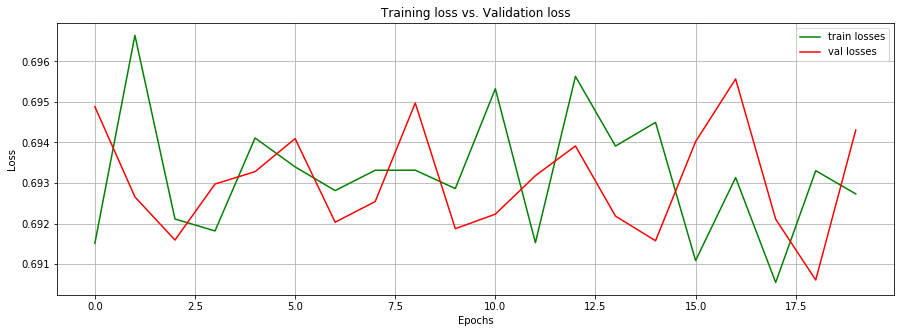

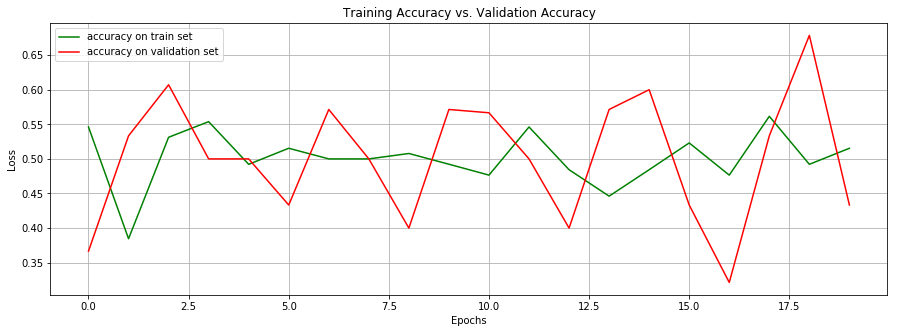

In [17]:
from matplotlib import pyplot as plt

losses, val_losses = history.losses, history.val_losses 
fig = plt.figure(figsize=(15, 5)) 
plt.plot(fitted_model.history['loss'], 'g', label="train losses") 
plt.plot(fitted_model.history['val_loss'], 'r', label="val losses") 
plt.grid(True) 
plt.title('Training loss vs. Validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

losses, val_losses = history.losses, history.val_losses 
fig = plt.figure(figsize=(15, 5)) 
plt.plot(fitted_model.history['acc'], 'g', label="accuracy on train set") 
plt.plot(fitted_model.history['val_acc'], 'r', label="accuracy on validation set") 
plt.grid(True) 
plt.title('Training Accuracy vs. Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 